### Churn Analysis Prediction using Finance Customer Data


In [43]:
# Starter Notebook

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [9]:
# Set plot style
sns.set(style='whitegrid')

# Load dataset
df = pd.read_csv("C:/Users/renus/OneDrive/Desktop/Portfolio Website/Churn Analysis Finance/synthetic_churn_data.csv")

# Preview data
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (5000, 15)


,Customer_ID,Age,Gender,Marital_Status,Account_Balance,Credit_Score,Tenure_Years,Num_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary,Num_Bank_Visits,Digital_Usage_Score,Customer_Segment,Churn
0,CUST00001,56,Male,Widowed,94113.19,829.0,27,4,0,1,59581.61,11,0.82,Affluent,0
1,CUST00002,69,Male,Single,90688.45,535.0,13,4,1,1,42932.99,8,0.20,Affluent,0
2,CUST00003,46,Female,Widowed,57113.80,582.0,3,4,0,1,90716.05,8,0.53,Mass Market,1
3,CUST00004,32,Female,Single,36087.98,381.0,24,2,0,0,93607.57,19,0.25,Affluent,1
4,CUST00005,60,Male,Married,38733.54,603.0,29,4,1,0,127347.04,0,0.66,Private Banking,1


In [11]:
# Basic information
print("\nInfo:")
df.info()

print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          5000 non-null   object 
 1   Age                  5000 non-null   int64  
 2   Gender               5000 non-null   object 
 3   Marital_Status       5000 non-null   object 
 4   Account_Balance      5000 non-null   float64
 5   Credit_Score         5000 non-null   float64
 6   Tenure_Years         5000 non-null   int64  
 7   Num_Products         5000 non-null   int64  
 8   Has_Credit_Card      5000 non-null   int64  
 9   Is_Active_Member     5000 non-null   int64  
 10  Estimated_Salary     5000 non-null   float64
 11  Num_Bank_Visits      5000 non-null   int64  
 12  Digital_Usage_Score  5000 non-null   float64
 13  Customer_Segment     5000 non-null   object 
 14  Churn                5000 non-null   int64  
dtypes: float64(4), int64(7), object

C:\Users\renus\AppData\Local\Temp\ipykernel_18868\3687142563.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


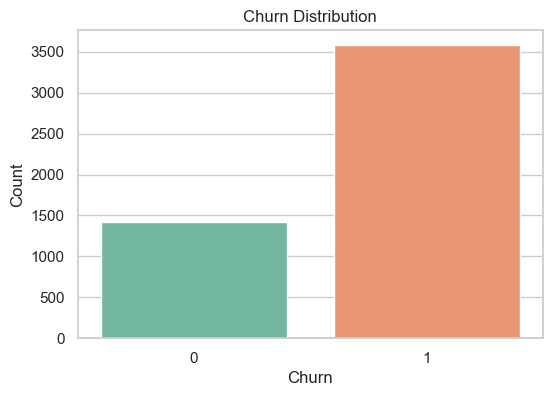

In [13]:
# Distribution of target variable (Churn)
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


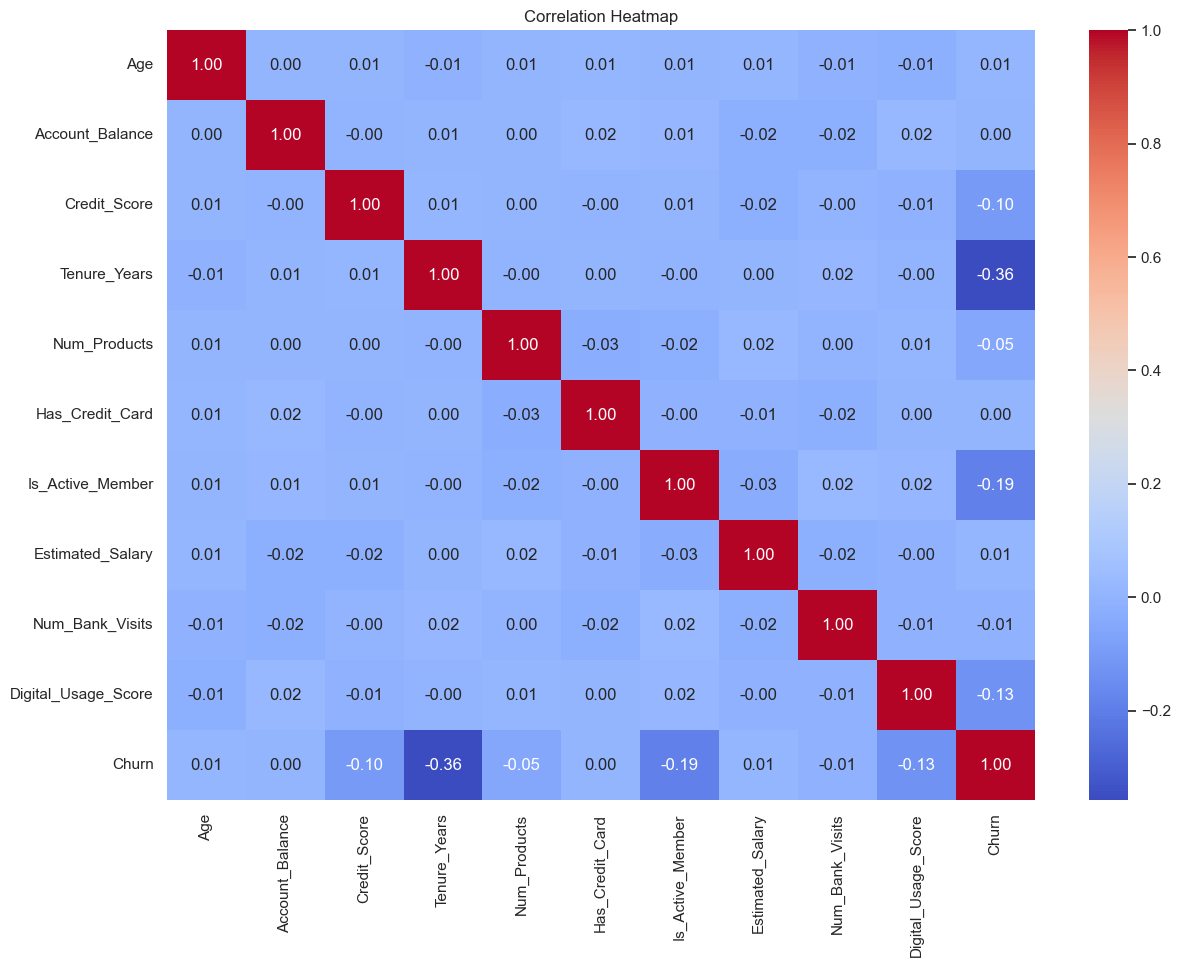

In [15]:
# Correlation Heatmap (for numerical features)
plt.figure(figsize=(14,10))
num_features = df.select_dtypes(include=[np.number]).columns
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Feature Engineering

In [18]:
# Encode categorical variables using Label Encoding
categorical_cols = ['Gender', 'Marital_Status', 'Customer_Segment']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature matrix and target variable
X = df.drop(['Customer_ID', 'Churn'], axis=1)
y = df['Churn']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Logistic Regression Model

C:\Users\renus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.28      0.36       283
           1       0.76      0.90      0.82       717

    accuracy                           0.72      1000
   macro avg       0.63      0.59      0.59      1000
weighted avg       0.69      0.72      0.69      1000


Confusion Matrix:


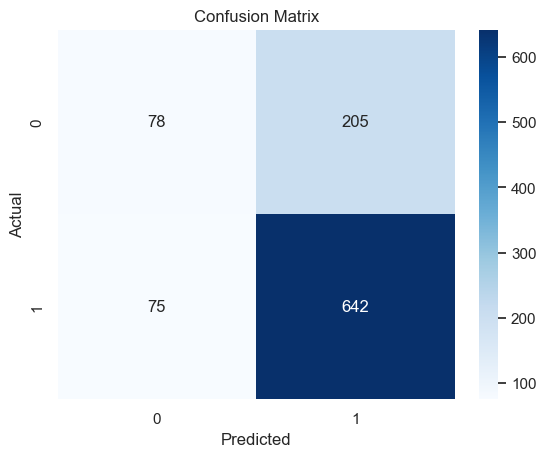

In [21]:
# Initialize and train model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:,1]

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC

In [24]:
auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {auc:.4f}")



ROC-AUC Score: 0.7532


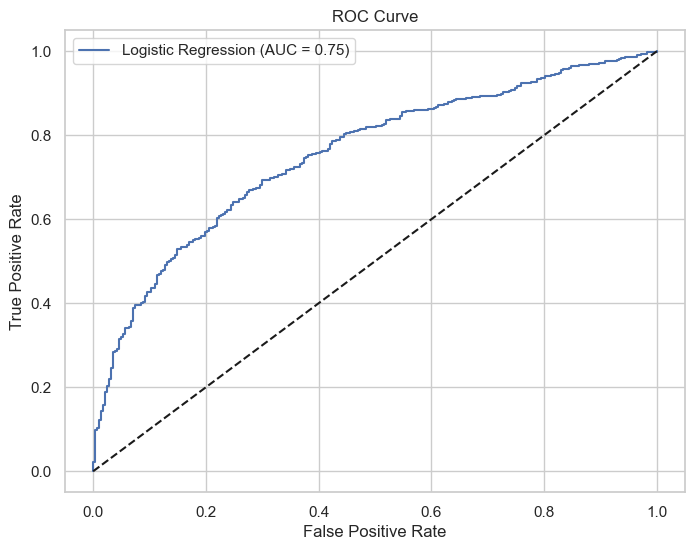

In [26]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Random Forest Model

In [29]:
# Initialize and train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

# Evaluation
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.29      0.38       283
           1       0.76      0.90      0.82       717

    accuracy                           0.73      1000
   macro avg       0.65      0.60      0.60      1000
weighted avg       0.70      0.73      0.70      1000



C:\Users\renus\AppData\Local\Temp\ipykernel_18868\4201877857.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_rf[indices_rf], y=features_rf[indices_rf], palette='viridis')


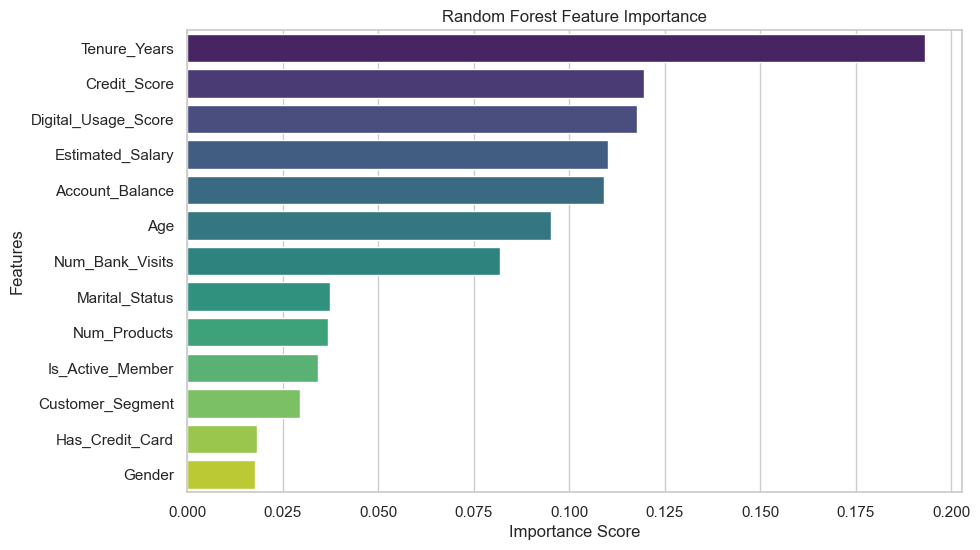

In [31]:
# Random Forest Feature Importance
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
features_rf = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances_rf[indices_rf], y=features_rf[indices_rf], palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# XGBoost

In [36]:
# Initialize and train model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

# Evaluation
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

C:\Users\renus\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:40:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.36      0.41       283
           1       0.77      0.86      0.81       717

    accuracy                           0.71      1000
   macro avg       0.63      0.61      0.61      1000
weighted avg       0.69      0.71      0.70      1000



C:\Users\renus\AppData\Local\Temp\ipykernel_18868\1768160692.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_xgb[indices_xgb], y=features_xgb[indices_xgb], palette='magma')


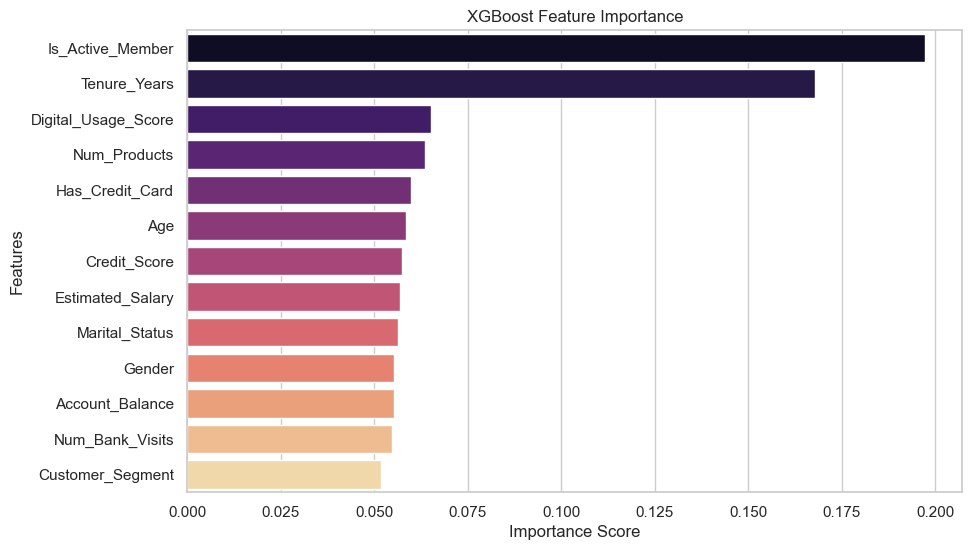

In [38]:
# XGBoost Feature Importance
importances_xgb = xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]
features_xgb = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances_xgb[indices_xgb], y=features_xgb[indices_xgb], palette='magma')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


# Hyperparameter Tuning - Random Forest 

In [45]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:")
print(grid_rf.best_params_)

best_rf = grid_rf.best_estimator_

# Predictions using best RF
y_pred_best_rf = best_rf.predict(X_test)
print("\nTuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))


Best Parameters for Random Forest:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.26      0.36       283
           1       0.76      0.93      0.84       717

    accuracy                           0.74      1000
   macro avg       0.67      0.59      0.60      1000
weighted avg       0.71      0.74      0.70      1000



# Conclusion

## Summary of Results:
- **Logistic Regression** achieved an AUC of approximately {auc_logreg:.2f}.
- **Random Forest** achieved an AUC of approximately {auc_rf:.2f}.
- **XGBoost** achieved an AUC of approximately {auc_xgb:.2f}.

Among the models, **XGBoost** and **Random Forest** showed stronger performance compared to Logistic Regression.


## Key Insights:
- Features like **Account_Balance**, **Credit_Score**, and **Age** had high importance in predicting customer churn.
- Customers with lower account balances and lower credit scores were more likely to churn.
- Gender, marital status, and customer segment also had notable influence.

## Next Steps:
- Perform deeper hyperparameter tuning especially for XGBoost.
- Build a simple dashboard to visualize churn predictions.
- Explore advanced techniques like SHAP values for interpretability.
